In [12]:
# update pytorch and fastai to latest versions
#!pip install torch -U
#!pip install torchvision -U
#!pip install fastai -U 
!pip install kaggle

    100% |████████████████████████████████| 61kB 33.6MB/s 
    100% |████████████████████████████████| 81kB 38.0MB/s 
  Stored in directory: /home/jupyter/.cache/pip/wheels/db/6a/80/6cd1892eb9b9b136333db3c74e16cba4e17e2c700f51541f06
  Stored in directory: /home/jupyter/.cache/pip/wheels/0f/96/ca/85f5b01165975402d1e37f8dd346df00dc39be1d0761bd17bb
Successfully built kaggle python-slugify


In [2]:
# import libraries
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import random
import os

# Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [4]:
# mount your google drive so you can save to it
# from google.colab import drive
# drive.mount('/content/gdrive')

In [16]:
os.getcwd()

'/home/jupyter/projects/blindness_detection'

In [6]:
#os.mkdir('blindness_detection')

In [8]:
os.listdir()

['data',
 '.ipynb_checkpoints',
 'trial3_aptos.ipynb',
 'trial2_aptos.ipynb',
 'trial1_aptos.ipynb']

In [78]:
# create environment variables for kaggle to authenticate with
#os.environ['KAGGLE_USERNAME'] = "insert-here"
#os.environ['KAGGLE_KEY'] = "insert-here"

In [13]:
!kaggle competitions download -c aptos2019-blindness-detection -p 'data'

100%|██████████████████████████████████████▉| 8.01G/8.01G [02:09<00:00, 157MB/s]
100%|██████████████████████████████████████| 8.01G/8.01G [02:09<00:00, 66.5MB/s]
 99%|██████████████████████████████████████▌| 1.48G/1.50G [00:10<00:00, 135MB/s]
100%|███████████████████████████████████████| 1.50G/1.50G [00:10<00:00, 150MB/s]
  0%|                                               | 0.00/53.7k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 53.7k/53.7k [00:00<00:00, 55.1MB/s]
  0%|                                               | 0.00/24.5k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 24.5k/24.5k [00:00<00:00, 37.3MB/s]
  0%|                                               | 0.00/28.3k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 28.3k/28.3k [00:00<00:00, 44.8MB/s]


In [15]:
os.listdir()

['data',
 '.ipynb_checkpoints',
 'trial3_aptos.ipynb',
 'trial2_aptos.ipynb',
 'trial1_aptos.ipynb']

In [18]:
#!unzip 'data/train_images.zip' -d 'data/train_images'
#!unzip 'data/test_images.zip' -d 'data/test_images'

In [19]:
from pathlib import Path

#create path variable to primary directory
path = Path(os.getcwd())
path

PosixPath('/home/jupyter/projects/blindness_detection')

In [20]:
# make a dataframe from train.csv
train_df = pd.read_csv(path/'data/train.csv')
# make a dataframe from test.csv
test_df = pd.read_csv(path/'data/test.csv')

In [21]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [22]:
test_df.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [23]:
# create a dictionary for the varying levels of diabetic retinopathy
dr_dict = {0: 'No DR', # no diabetic retinopathy,
           1: 'Mild', # mild case of diabetic retinopathy,
           2: 'Moderate', # moderate level of diabetic retinopathy
           3: 'Severe', # severe case of diabetic retinopathy
           4: 'Proliferative DR' # worst case scenario
          }

In [24]:
# create target column that generates more descriptive labels vs. integer values
train_df['target'] = train_df['diagnosis'].map(dr_dict)

In [25]:
train_df.tail()

,id_code,diagnosis,target
3657,ffa47f6a7bf4,2,Moderate
3658,ffc04fed30e6,0,No DR
3659,ffcf7b45f213,2,Moderate
3660,ffd97f8cd5aa,0,No DR
3661,ffec9a18a3ce,2,Moderate


In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 3 columns):
id_code      3662 non-null object
diagnosis    3662 non-null int64
target       3662 non-null object
dtypes: int64(1), object(2)
memory usage: 85.9+ KB


In [27]:
# convert target column to categorical type
train_df['target'] = train_df['target'].astype('category')

In [28]:
# drop diagnosis column
train_df.drop(labels='diagnosis', axis=1, inplace=True)

In [29]:
train_df.head()

,id_code,target
0,000c1434d8d7,Moderate
1,001639a390f0,Proliferative DR
2,0024cdab0c1e,Mild
3,002c21358ce6,No DR
4,005b95c28852,No DR


In [30]:
os.listdir()

['data',
 '.ipynb_checkpoints',
 'trial3_aptos.ipynb',
 'trial2_aptos.ipynb',
 'trial1_aptos.ipynb']

In [32]:
# import deep learning libraries
import torch
import fastai
from fastai import *
from fastai.vision import *

data = (ImageDataBunch.from_df(path=path/'data/train_images',
                              df=train_df,
                              suffix='.png',
                              size=64,
                              bs=16))

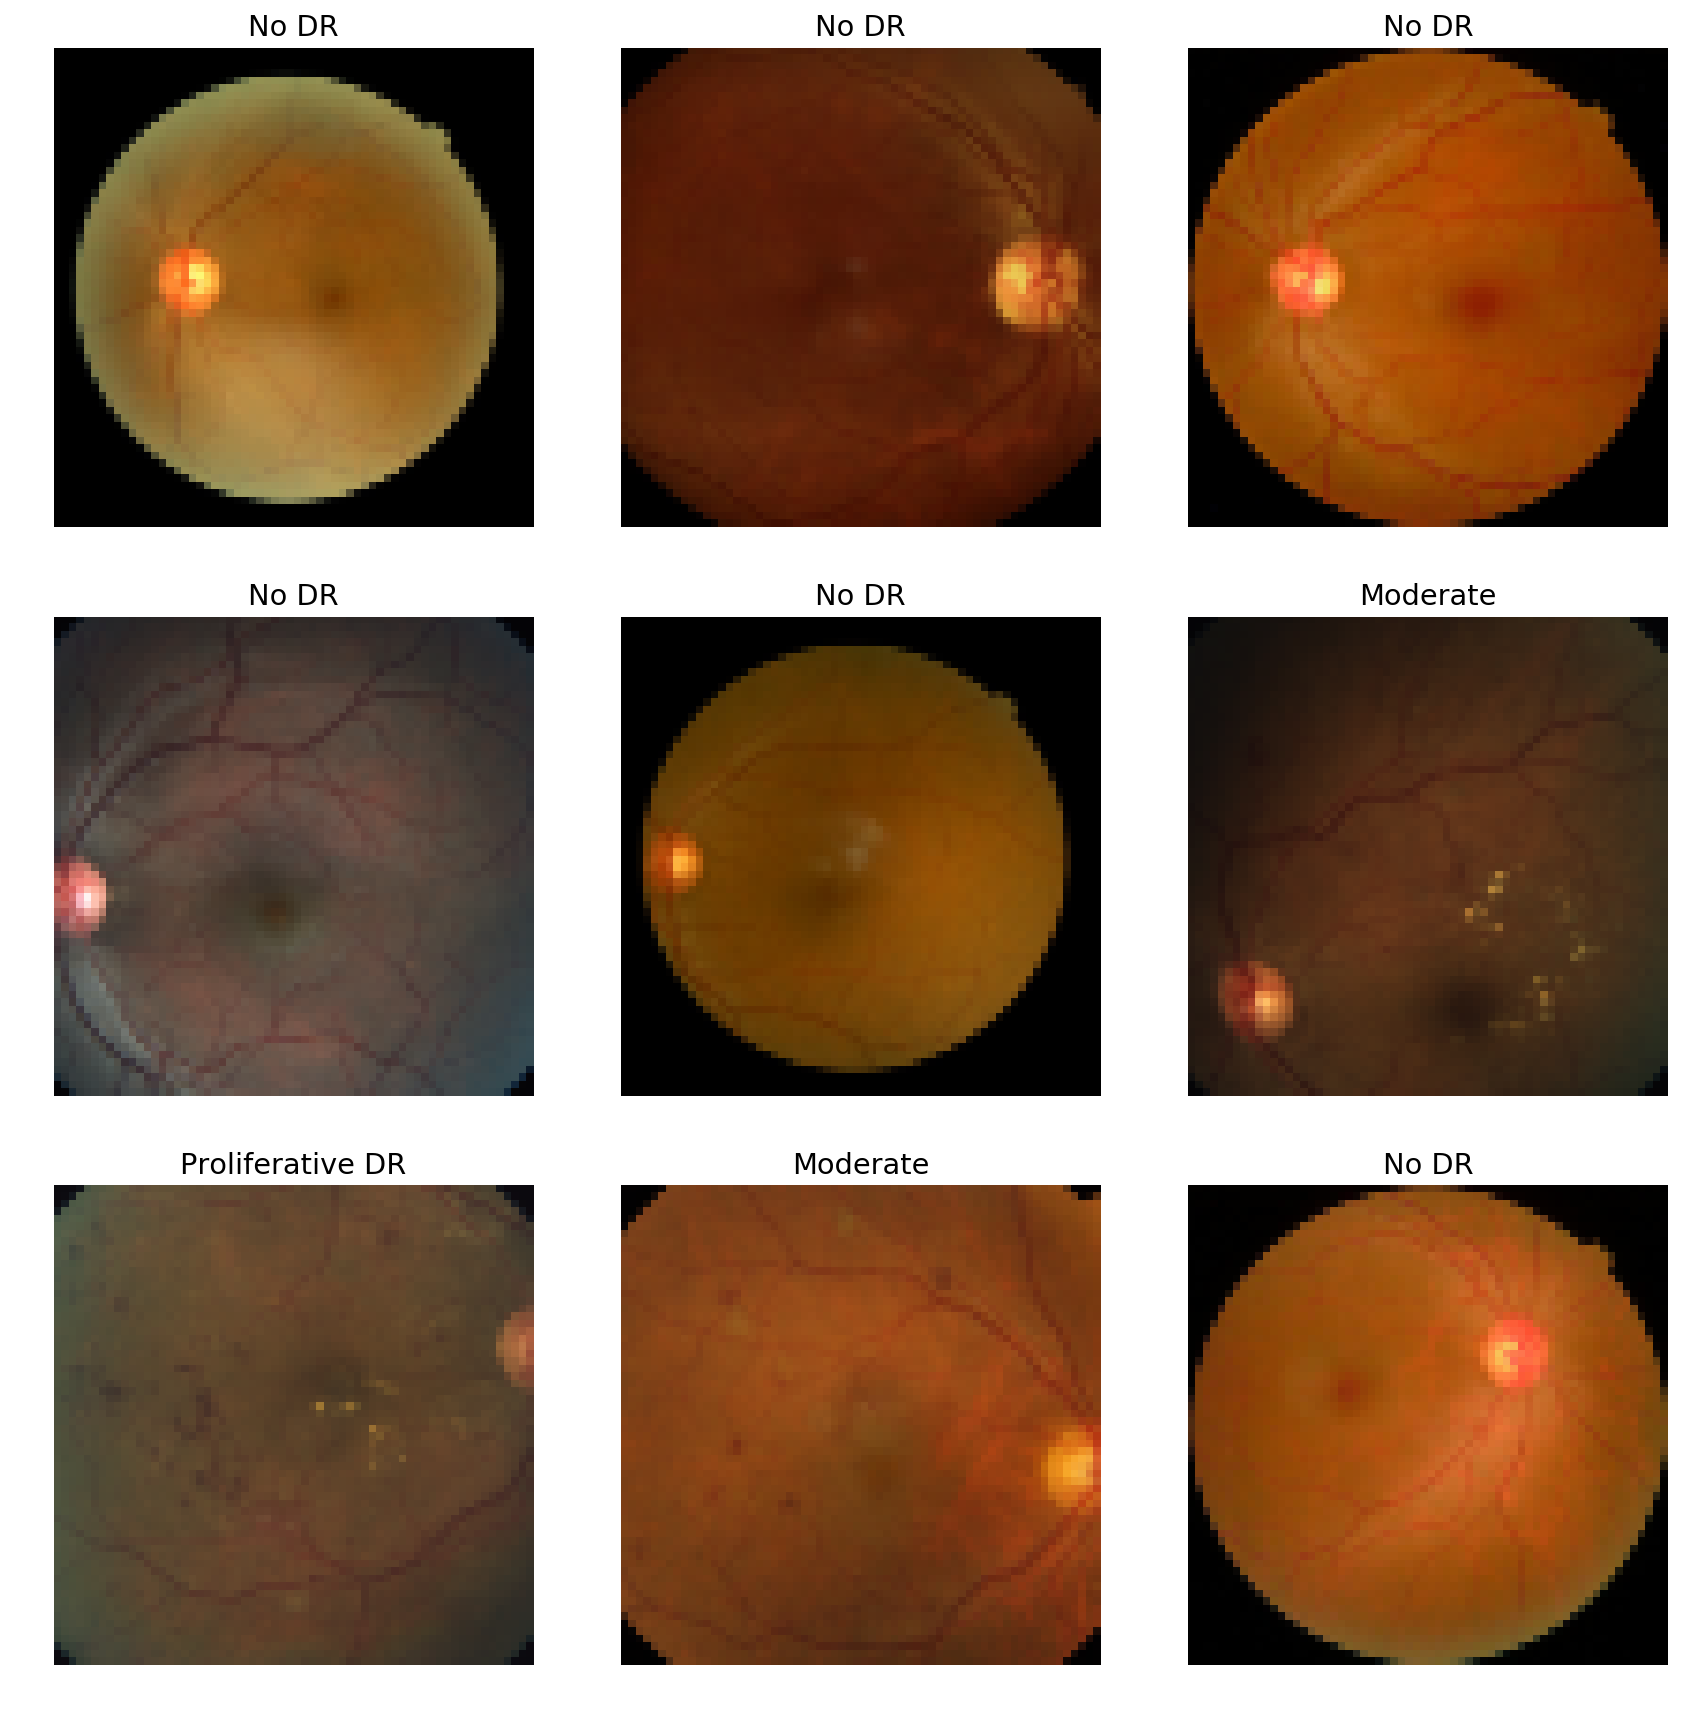

In [33]:
data.show_batch(rows=3)

In [35]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2930 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Proliferative DR,No DR,Proliferative DR,No DR,Moderate
Path: /home/jupyter/projects/blindness_detection/data/train_images;

Valid: LabelList (732 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Moderate,Moderate,No DR,No DR,Moderate
Path: /home/jupyter/projects/blindness_detection/data/train_images;

Test: None

In [37]:
# add test set
data.add_test(ImageList.from_df(test_df, path = path/'data/test_images', suffix='.png'))

In [38]:
data

ImageDataBunch;

Train: LabelList (2930 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Proliferative DR,No DR,Proliferative DR,No DR,Moderate
Path: /home/jupyter/projects/blindness_detection/data/train_images;

Valid: LabelList (732 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Moderate,Moderate,No DR,No DR,Moderate
Path: /home/jupyter/projects/blindness_detection/data/train_images;

Test: LabelList (1928 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: EmptyLabelList
,,,,
Path: /home/jupyter/projects/blindness_detection/data/train_images

# Create Learner and Model Training

In [48]:
# create Kappa Score metric
kappa = KappaScore()
kappa.weights = "quadratic"

# create recall and precision objects
recall = Recall(average='macro')
precision = Precision(average='macro')

In [49]:
path

PosixPath('/home/jupyter/projects/blindness_detection')

In [50]:
learn = cnn_learner(data, models.resnet101,
                    metrics=[error_rate, kappa, recall, precision],
                    pretrained=True,
                    bn_final=True,
                    path=path/'models')

In [51]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [52]:
os.getcwd()

'/home/jupyter/projects/blindness_detection'

In [53]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.92E-02
Min loss divided by 10: 6.31E-02


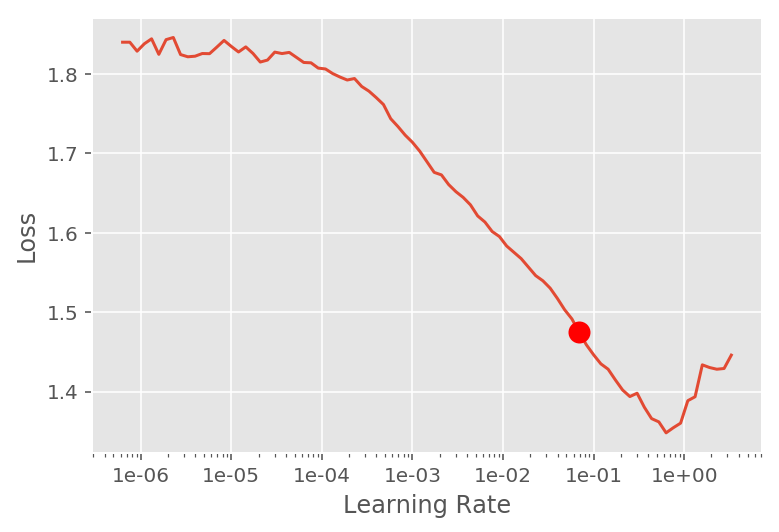

In [54]:
learn.recorder.plot(suggestion=True)

In [55]:
# set learning rate
lr = learn.recorder.min_grad_lr
lr

0.06918309709189363

In [56]:
learn.metrics

[<function fastai.metrics.error_rate(input: torch.Tensor, targs: torch.Tensor) -> <function NewType.<locals>.new_type at 0x7fa40b2eb620>>,
 KappaScore(weights='quadratic'),
 Recall(average='macro', pos_label=1, eps=1e-09),
 Precision(average='macro', pos_label=1, eps=1e-09)]

In [57]:
from fastai.callbacks import SaveModelCallback, EarlyStoppingCallback

learn.fit_one_cycle(5, lr, callbacks=[(SaveModelCallback(learn, every='improvement',
                                                         monitor='kappa_score', name='trial3-rd1-GCP')),
                                      EarlyStoppingCallback(learn, monitor='kappa_score', 
                                                            min_delta=0.05, patience=3)])

epoch,train_loss,valid_loss,error_rate,kappa_score,recall,precision,time
0,0.954307,0.994687,0.308743,0.244155,0.398260,nan,02:28
1,0.859112,0.949246,0.299180,0.237355,0.368197,nan,02:29
2,0.767582,0.816028,0.275956,0.232069,0.395651,nan,02:27
3,0.702349,0.793674,0.244536,0.265542,0.476130,nan,02:27


Better model found at epoch 0 with kappa_score value: 0.24415457248687744.
Better model found at epoch 3 with kappa_score value: 0.26554155349731445.
Better model found at epoch 4 with kappa_score value: 0.2884802222251892.
Epoch 4: early stopping


In [58]:
# learn.save('trial2-rd1');

# Increase Image Size to 128

In [59]:
data_128 = (ImageDataBunch.from_df(path=path/'data/train_images',
                              df=train_df,
                              suffix='.png',
                              size=128,
                              bs=16))

In [60]:
data_128.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2930 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Moderate,Proliferative DR,No DR,No DR,No DR
Path: /home/jupyter/projects/blindness_detection/data/train_images;

Valid: LabelList (732 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Moderate,Mild,No DR,No DR,Moderate
Path: /home/jupyter/projects/blindness_detection/data/train_images;

Test: None

In [61]:
# add test set
data_128.add_test(ImageList.from_df(test_df, path = path/'data/test_images', suffix='.png'))

In [62]:
# feed data_128 into learner
learn.data = data_128

In [63]:
# load weights from previous round of training
learn.load(path/'models/models/trial3-rd1-GCP');

In [64]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.29E-06
Min loss divided by 10: 1.20E-04


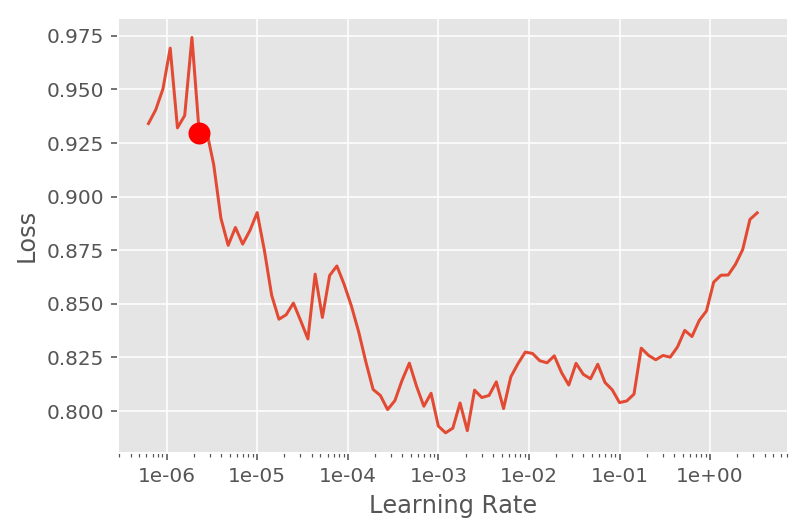

In [65]:
learn.recorder.plot(suggestion=True)

In [66]:
learn.fit_one_cycle(5, 1e-4, callbacks=[(SaveModelCallback(learn, every='improvement', 
                                                    monitor='kappa_score', name='trial3-rd2-GCP')),
                                 EarlyStoppingCallback(learn, monitor='kappa_score', 
                                                       min_delta=0.05, patience=3)])

epoch,train_loss,valid_loss,error_rate,kappa_score,recall,precision,time
0,0.794021,0.763386,0.299180,0.231982,0.394824,nan,02:28
1,0.757750,0.728252,0.277322,0.257683,0.415049,nan,02:30
2,0.735581,0.715733,0.273224,0.255882,0.415953,nan,02:29
3,0.740275,0.704025,0.267760,0.261368,0.421433,nan,02:30


Better model found at epoch 0 with kappa_score value: 0.23198199272155762.
Better model found at epoch 1 with kappa_score value: 0.2576826214790344.
Better model found at epoch 3 with kappa_score value: 0.2613682746887207.
Better model found at epoch 4 with kappa_score value: 0.2648807168006897.
Epoch 4: early stopping


# Increase Image Size to 256

In [68]:
data_256 = (ImageDataBunch.from_df(path=path/'data/train_images',
                              df=train_df,
                              suffix='.png',
                              size=256,
                              bs=16))

In [69]:
data_256.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2930 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Moderate,Mild,No DR,No DR,Proliferative DR
Path: /home/jupyter/projects/blindness_detection/data/train_images;

Valid: LabelList (732 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
No DR,Moderate,Proliferative DR,Mild,No DR
Path: /home/jupyter/projects/blindness_detection/data/train_images;

Test: None

In [71]:
# add test set
data_256.add_test(ImageList.from_df(test_df, path = path/'data/test_images', suffix='.png'))

In [72]:
# feed data_256 into learner
learn.data = data_256

In [73]:
# load weights from previous round of training
learn.load(path/'models/models/trial3-rd2-GCP');

In [74]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.75E-06
Min loss divided by 10: 2.51E-04


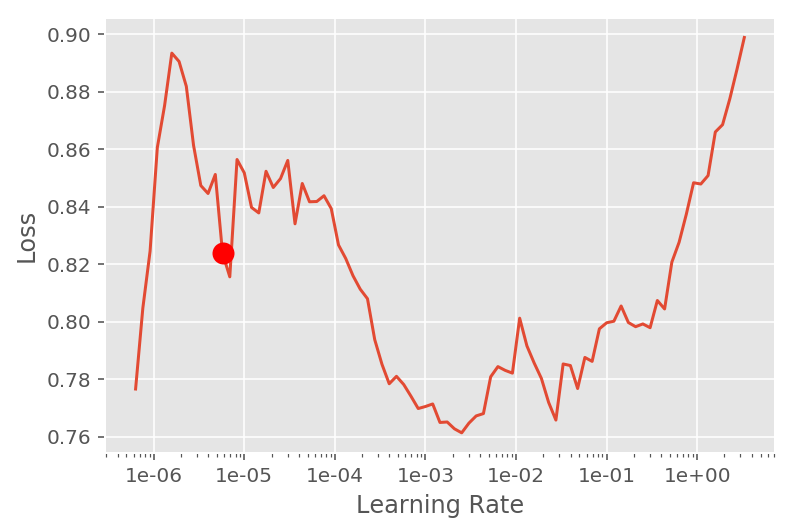

In [75]:
learn.recorder.plot(suggestion=True)

In [76]:
# set new learning rate
lr = 1e-4
lr

0.0001

In [77]:
learn.fit_one_cycle(5, lr, callbacks=[(SaveModelCallback(learn, every='improvement', 
                                                         monitor='kappa_score', name='trial3-rd3-GCP')),
                                      EarlyStoppingCallback(learn, monitor='kappa_score', 
                                                            min_delta=0.05, patience=3)])

epoch,train_loss,valid_loss,error_rate,kappa_score,recall,precision,time
0,0.798067,0.750701,0.270492,0.248975,0.414956,nan,02:39
1,0.743216,0.717671,0.254098,0.248528,0.430599,nan,02:35
2,0.751112,0.694775,0.245902,0.255443,0.436424,nan,02:39
3,0.695102,0.710711,0.256831,0.264891,0.434438,nan,02:37


Better model found at epoch 0 with kappa_score value: 0.2489747405052185.
Better model found at epoch 2 with kappa_score value: 0.2554425001144409.
Better model found at epoch 3 with kappa_score value: 0.2648913264274597.
Epoch 4: early stopping


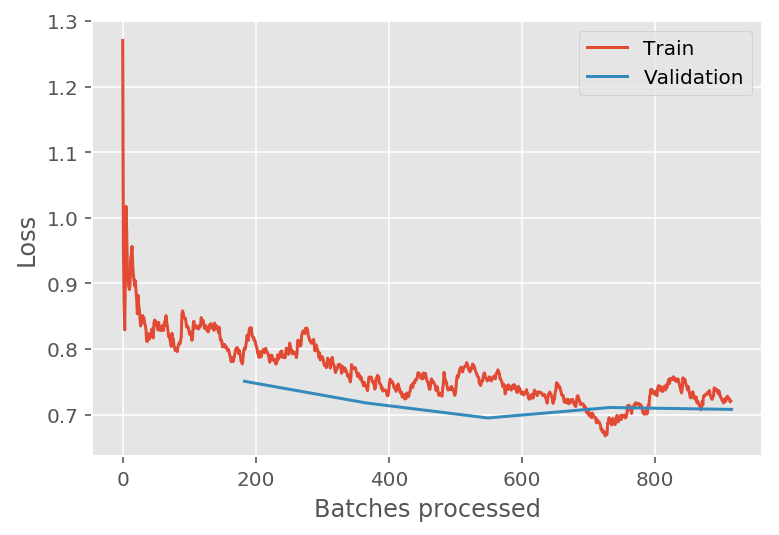

In [79]:
learn.recorder.plot_losses()

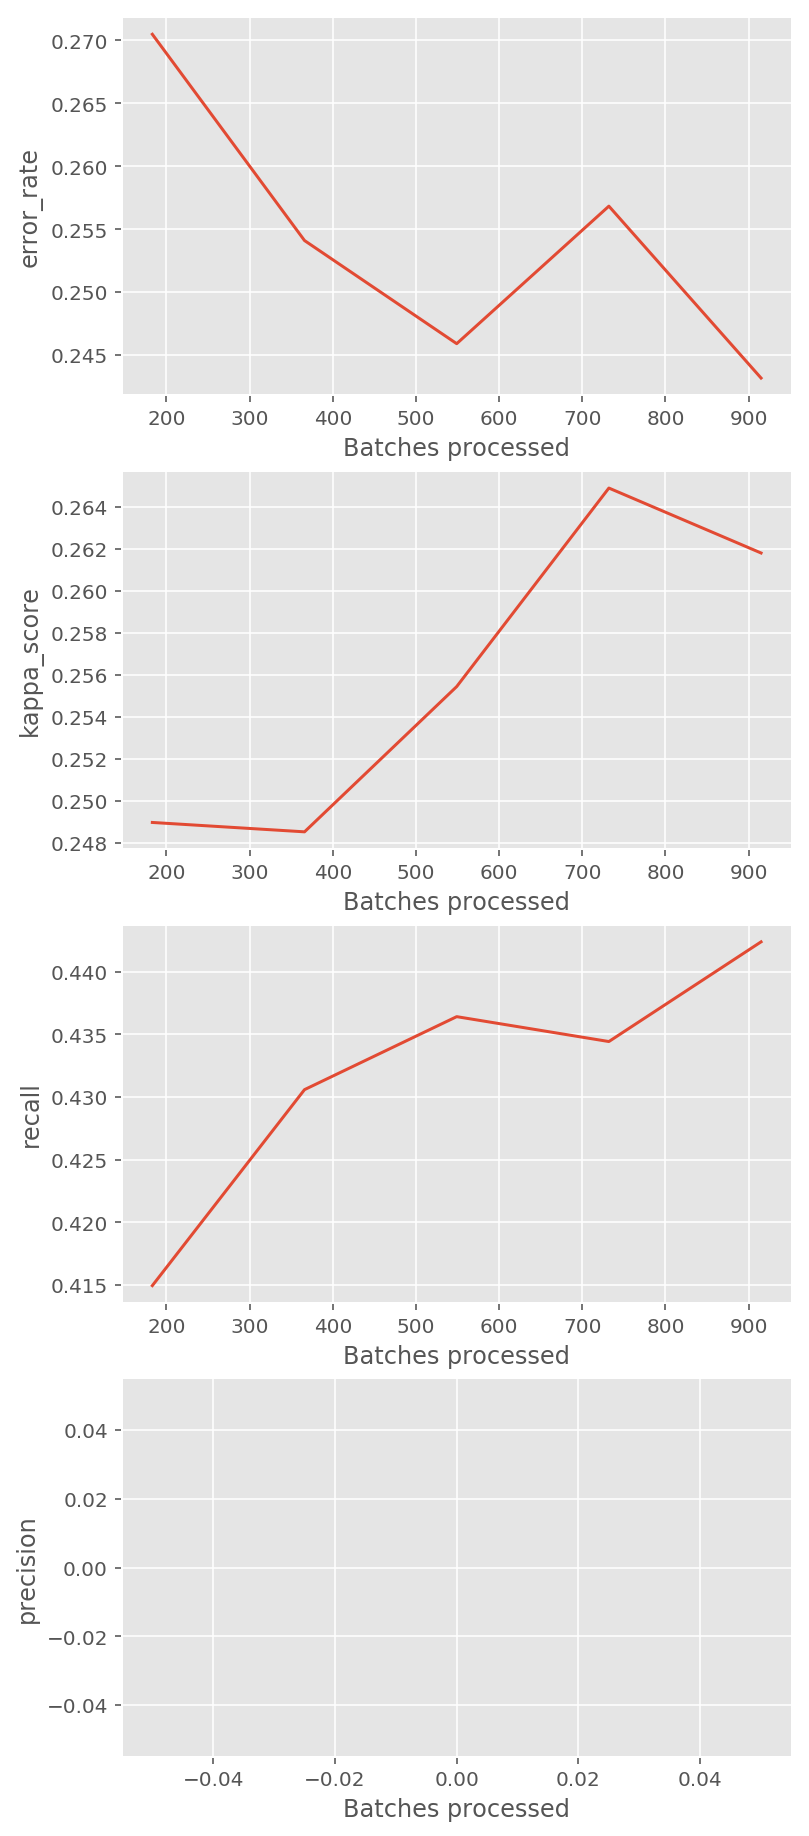

In [80]:
learn.recorder.plot_metrics()

In [82]:
learn.metrics = [error_rate, kappa]

# Unfreeze Lower Layers & Continue Training

In [83]:
# load weights from previous round of training
learn.load(path/'models/models/trial3-rd3-GCP');

In [84]:
learn.unfreeze()

In [85]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 4.37E-05
Min loss divided by 10: 2.75E-05


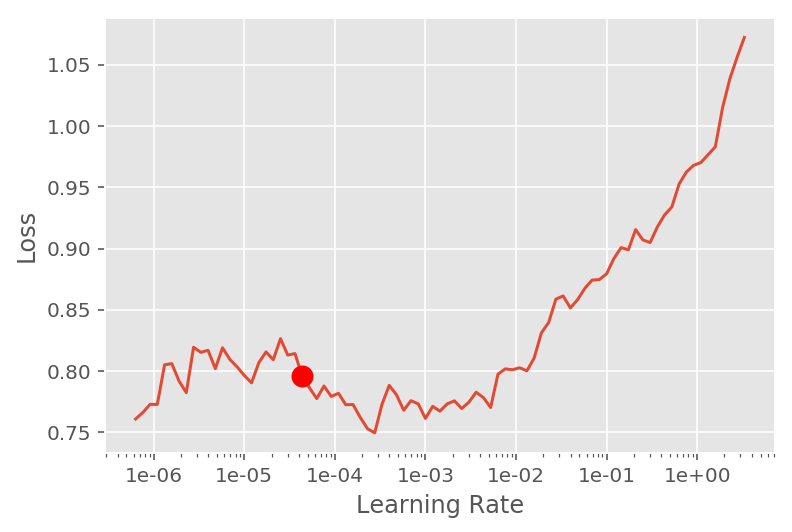

In [86]:
learn.recorder.plot(suggestion=True)

In [88]:
# set new learning rate
lr = learn.recorder.min_grad_lr
lr

4.365158322401661e-05

In [89]:
# train with learning rate annealing
learn.fit_one_cycle(5, slice(lr, lr/10), 
                    callbacks=[(SaveModelCallback(learn, every='improvement', monitor='kappa_score', 
                                                  name='trial3-rd4-GCP')),
                               EarlyStoppingCallback(learn, monitor='kappa_score', min_delta=0.05, 
                                                     patience=3)])

epoch,train_loss,valid_loss,error_rate,kappa_score,time
0,0.705209,0.627925,0.234973,0.286321,02:40
1,0.655370,1.050825,0.234973,0.259532,02:42
2,0.599156,7.891488,0.233607,0.268777,02:40
3,0.552726,0.573166,0.224044,0.310992,02:42
4,0.567162,0.568457,0.218579,0.346822,02:40


Better model found at epoch 0 with kappa_score value: 0.2863208055496216.
Better model found at epoch 3 with kappa_score value: 0.3109920024871826.
Better model found at epoch 4 with kappa_score value: 0.34682244062423706.


# Interpretation of The Results

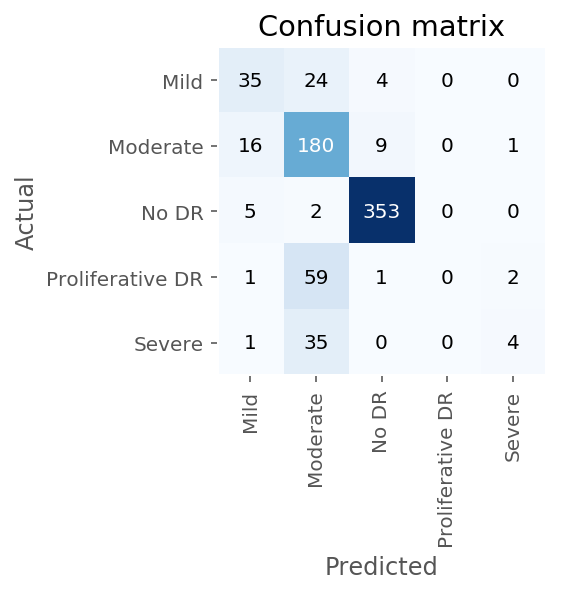

In [90]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix()